In [1]:
import plane_extractor
import BPD
import numpy as np
import remove_wall
import open3d as o3d
import numpy as np
from tqdm import tqdm

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


# Load point cloud data

In [2]:
xyz = np.loadtxt('points.txt', delimiter=' ')
xyz.shape, xyz

((7242, 3),
 array([[1.596447e+02, 1.434000e+00, 4.350000e-02],
        [1.588055e+02, 3.018800e+00, 3.200000e-02],
        [1.577942e+02, 5.002000e+00, 1.960000e-02],
        ...,
        [2.136085e+02, 9.413550e+01, 6.056479e+02],
        [2.443198e+02, 7.408460e+01, 6.015392e+02],
        [2.694602e+02, 5.860350e+01, 5.978210e+02]]))

In [3]:
pc = o3d.geometry.PointCloud()
pc.points = o3d.utility.Vector3dVector(xyz)

# Run `main.py` Code

The `main.py` file has been removed in this project
```python
import plane_extractor
import BPD
import numpy as np
import remove_wall
import open3d as o3d

def display_outlier(points, ind):
    inlier = points.select_by_index(ind)
    outlier = points.select_by_index(ind, invert=True)
    inlier.paint_uniform_color([0.7, 0.7, 0.7])
    outlier.paint_uniform_color([1, 0, 0])
    o3d.visualization.draw_geometries([inlier, outlier])

pc = o3d.io.read_point_cloud("cropped_1.ply")
#o3d.visualization.draw_geometries([pc])

#plane, high_z, min_z = plane_extractor.extract_plane(pc)
#boundary = BPD.cal_boundary(plane, save_filename="ceil_boundary.txt")
boundary = np.loadtxt("ceil_boundary.txt")
points = np.array(pc.points)
high_z = float(np.max(points[:, 2]))
min_z = float(np.min(points[:, 2]))

props = remove_wall.remove_wall(points, boundary, method="cylinder", radius=0.07, min_z=min_z, high_z=high_z)

o3d.visualization.draw_geometries([props])
```

## Convert 3D point cloud to 2D point cloud

Using this function to convert 3D to a plane

In [4]:
plane, high_z, min_z = plane_extractor.extract_plane(pc)
plane, high_z, min_z

(array([[153.6428, 276.4993],
        [144.9014,  91.1236],
        [172.3599, 286.54  ],
        ...,
        [133.5898, 284.2302],
        [125.8008, 210.4524],
        [126.4546, 200.7356]]),
 228.6251,
 -0.0009)

Boundary detection

In [12]:
boundary = BPD.cal_boundary(plane)

cal_boundary:  24%|██▍       | 581/2380 [00:03<00:09, 182.70it/s]

It produces 'fake' 3D results (z axis all 0)

In [6]:
boundary.shape, boundary

((457, 3),
 array([[135.9721, 134.6511,   0.    ],
        [131.4434, 189.6365,   0.    ],
        [159.5204, 258.5824,   0.    ],
        ...,
        [125.8008, 210.4524,   0.    ],
        [126.4546, 200.7356,   0.    ],
        [  0.    ,   0.    ,   0.    ]]))

Draw figures to show the results

In [5]:
import matplotlib.pyplot as plt

In [15]:
bb = boundary[:-1,0:2]
bb

array([[1.359721e+02, 1.346511e+02],
       [1.314434e+02, 1.896365e+02],
       [1.595204e+02, 2.585824e+02],
       [1.344551e+02, 1.624210e+02],
       [1.355142e+02, 1.444772e+02],
       [1.376756e+02, 1.132833e+02],
       [1.395316e+02, 1.007762e+02],
       [1.355713e+02, 1.578454e+02],
       [1.355701e+02, 1.541275e+02],
       [1.527145e+02, 2.432432e+02],
       [1.352641e+02, 1.569637e+02],
       [1.356034e+02, 1.530340e+02],
       [1.696421e+02, 1.339610e+01],
       [1.356429e+02, 1.527899e+02],
       [1.694124e+02, 5.815070e+01],
       [1.876162e+02, 2.772780e+01],
       [1.382977e+02, 1.867535e+02],
       [1.431774e+02, 2.126132e+02],
       [1.286622e+02, 2.140053e+02],
       [1.403539e+02, 2.000083e+02],
       [1.682406e+02, 1.509610e+01],
       [1.643505e+02, 2.681113e+02],
       [1.358335e+02, 1.634998e+02],
       [1.356624e+02, 1.594362e+02],
       [1.779928e+02, 2.945781e+02],
       [1.497291e+02, 2.348416e+02],
       [1.356258e+02, 1.599319e+02],
 

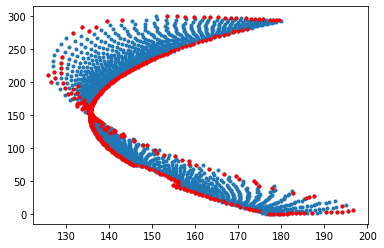

In [20]:
plt.scatter(*plane.T, marker='.')
plt.scatter(*bb.T, marker='.', color='r')

## Return results back to 3D point cloud

In [29]:
points = np.array(pc.points)
points.shape, points

((7242, 3),
 array([[1.596447e+02, 1.434000e+00, 4.350000e-02],
        [1.588055e+02, 3.018800e+00, 3.200000e-02],
        [1.577942e+02, 5.002000e+00, 1.960000e-02],
        ...,
        [2.136085e+02, 9.413550e+01, 6.056479e+02],
        [2.443198e+02, 7.408460e+01, 6.015392e+02],
        [2.694602e+02, 5.860350e+01, 5.978210e+02]]))

In [30]:
high_z = float(np.max(points[:, 2]))
min_z = float(np.min(points[:, 2]))
high_z, min_z

(610.6522, -0.0009)

In [23]:
props_wall, props_bound = remove_wall.remove_wall(points, boundary[:,0:2], method="cylinder", radius=0.07, min_z=min_z, high_z=high_z)

Remove Cylinder: 100%|██████████| 457/457 [00:00<00:00, 460.20it/s]


In [25]:
props_wall, props_bound = remove_wall.remove_cylinder(points, boundary[:,0:2], radius=0.07, min_z=min_z, high_z=high_z)

Remove Cylinder: 100%|██████████| 457/457 [00:01<00:00, 453.88it/s]


In [26]:
props_wall

PointCloud with 6759 points.

In [23]:
props_bound.shape, props_bound

((6759,), array([   0,    1,    2, ..., 7239, 7240, 7241]))

In [27]:
pcd_bound = pc.select_by_index(props_bound, invert=True)
pcd_bound.paint_uniform_color(np.array([1,0,0]))

props_wall.paint_uniform_color(np.array([0,0,0]))

PointCloud with 6759 points.

3D preview by Open3D

In [28]:
o3d.visualization.draw_geometries([props_wall, pcd_bound])

---

# Work on 3D point cloud directly

In [31]:
boundary = BPD.cal_boundary(np.array(pc.points))

cal_boundary:   0%|          | 0/7242 [00:00<?, ?it/s]


ValueError: operands could not be broadcast together with shapes (3,) (2,) 